In [2]:
import random
import networkx as nx
from matplotlib import pyplot as plt
from collections import Counter
from scipy.linalg import expm

import math
from utils.plotTools import plot_qwak
import os
import ast
import numpy as np
import json
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

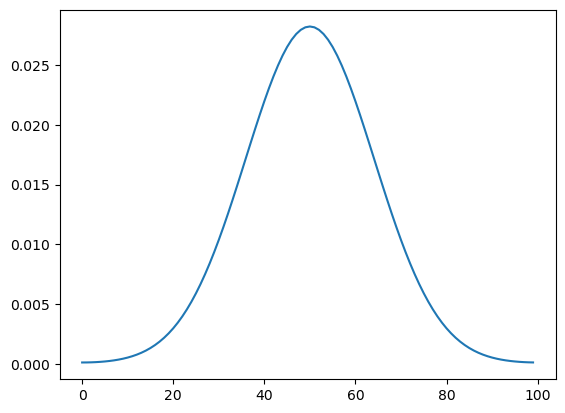

In [23]:

# Parameters
gamma = 1.0  # Transition rate

n = 100

G = nx.cycle_graph(n)

D = np.diag(list(dict(G.degree()).values()))
A = nx.to_numpy_array(G)

# The Laplacian matrix L
L =-gamma *(D - A)

# The generating matrix H

# Compute the transition matrix M(t) for any time t using the matrix exponential
def transition_matrix(L,t):
    return expm(L * t)

# Compute the probability distribution p(t) using Equation 3.30
def probability_distribution(L, init, t):
    p0 = np.zeros(len(G))
    p0[init] = 1
    M_t = transition_matrix(L,t)
    return np.dot(M_t, p0)

# Example initial distribution: starting from state 0

init = 50

# Compute p(t) for a given t
t = 100  # For example, at t = 1
p_t = probability_distribution(L,init, t)

# print(f"Probability distribution at time t={t}: {p_t}")
plt.plot(list(p_t))